In [3]:

from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import label_ranking_average_precision_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1) 데이터 로드 & 분할
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=0
)

print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

MSE: 0.460, R²: 0.647
5.00001 5.00001


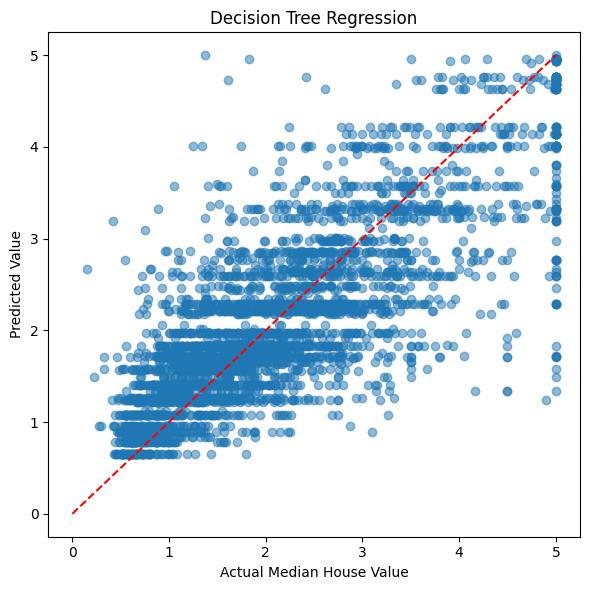

In [8]:

# 2) 모델 학습
reg = DecisionTreeRegressor(max_depth=7, random_state=0)
reg.fit(X_train, y_train)

# 3) 평가
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}, R²: {r2:.3f}")

print(y_test.max(), y_pred.max())

# 4) 예측 vs 실제 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
m = max(y_test.max(), y_pred.max())
plt.plot([0, m], [0, m], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regression")
plt.tight_layout()
plt.show()


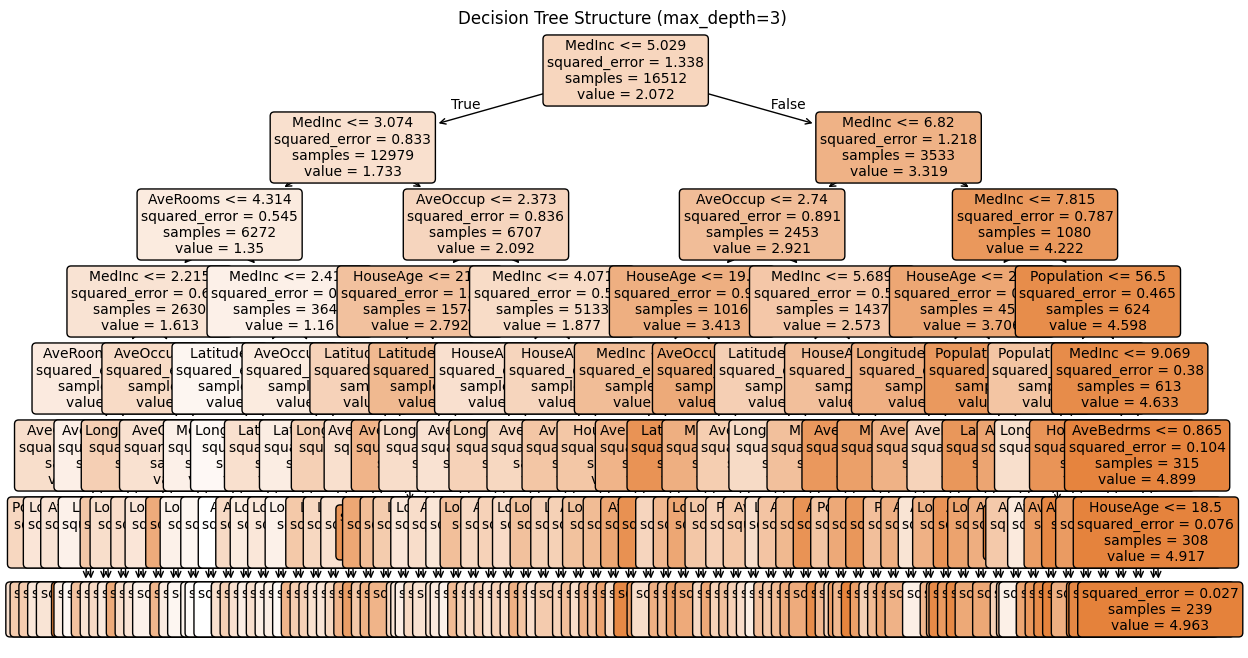

In [9]:
from sklearn.tree import plot_tree


plt.figure(figsize=(14,8))
plot_tree(
    reg,
    feature_names=housing.feature_names,
    class_names=housing.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure (max_depth=3)")
plt.show()  